In [23]:
import pandas as pd
import numpy as np
import nltk
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import contractions
from contractions import contractions_dict
contractions.add("n't", "not")
contractions.add("nt", "not")
import string
punctuation_string = string.punctuation
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) # Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time as t
import sklearn.metrics as sm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from jsondataset import files_in_directory
from pickle import dump
from pickle import load
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import RandomizedSearchCV

In [25]:
df = pd.read_csv('/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/combo_cleaned_2000.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14727 entries, 0 to 14726
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   polarity    14727 non-null  object
 1   review      14727 non-null  object
 2   nltk_texts  14727 non-null  object
dtypes: object(3)
memory usage: 345.3+ KB


In [27]:
df.dropna()

,polarity,review,nltk_texts
0,neut,accord gran company plan move production russi...,"<Text: According to Gran , the company has no...>"
1,neut,technopoli plan develop stage area less square...,<Text: Technopolis plans to develop in stages ...
2,neg,international electronic industry company elco...,<Text: The international electronic industry c...
3,pos,new production plant company would increase ca...,<Text: With the new production plant the compa...
4,pos,accord company s update strategy year basware ...,<Text: According to the company 's updated str...
...,...,...,...
14722,neut,love idea journal keep review need help half j...,<Text: I loved the idea of this journal and...>
14723,neut,nice idea like overall feel journal like other...,"<Text: Nice idea, and I like the overall feel...>"
14724,neut,sturdy cover protect movie journal journal wel...,<Text: Sturdy cover to protect this Movie Jour...
14725,neut,small format journal x total tab section recor...,"<Text: This is a small format journal 5 1/4""...>"


In [28]:
df['review']

0        accord gran company plan move production russi...
1        technopoli plan develop stage area less square...
2        international electronic industry company elco...
3        new production plant company would increase ca...
4        accord company s update strategy year basware ...
                               ...                        
14722    love idea journal keep review need help half j...
14723    nice idea like overall feel journal like other...
14724    sturdy cover protect movie journal journal wel...
14725    small format journal x total tab section recor...
14726    recipe journal another recipe holder call jour...
Name: review, Length: 14727, dtype: object

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14727 entries, 0 to 14726
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   polarity    14727 non-null  object
 1   review      14727 non-null  object
 2   nltk_texts  14727 non-null  object
dtypes: object(3)
memory usage: 345.3+ KB


In [30]:
y=df['polarity'].astype('str').array
X=df['review'].astype('str').array

In [31]:
X

<PandasArray>
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [32]:
# create pipeline
start_time = time.time()
estimators = []
vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=10000)
estimators.append(('vectorizer', vectorizer))
estimators.append(('scaler', StandardScaler(with_mean=False)))
estimators.append(('LinearSVC', LinearSVC(dual=False, max_iter=100)))
model_SVC = Pipeline(estimators)


# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model_SVC, X, y, cv=kfold)
scoring = 'accuracy'
cv_results = cross_val_score(model_SVC, X, y, cv=kfold, scoring=scoring)
model_SVC.fit(X, y)
predicted = cross_val_predict(model_SVC, X, y, cv=kfold)
#predicted_prob = cross_val_predict(model_SVC, X, y, cv=kfold, method='predict_proba')

cv results  [0.79633401 0.76306857 0.76442634 0.77596741 0.77528853 0.76103191
 0.78207739 0.78464674 0.76358696 0.78940217]
 
classification report
              precision    recall  f1-score   support

         neg       0.79      0.77      0.78      5028
        neut       0.71      0.75      0.73      4992
         pos       0.83      0.81      0.82      4707

    accuracy                           0.78     14727
   macro avg       0.78      0.78      0.78     14727
weighted avg       0.78      0.78      0.78     14727

 
accuracy 0.775582263869084
 
precision 0.7783705348534551
 
f1 0.7773655925946464
 
jaccard 0.6367997521235281
 
matthews corr 0.6633636562959191
 
cohen's kapp 0.6631391629711815
 
confusion matrix


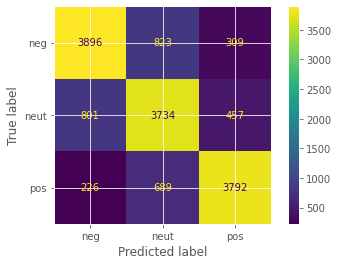

2.186432981491089


In [33]:
#results
print("cv results ", cv_results)
print(' ')
print("classification report")
print(sm.classification_report(y, predicted))
print(' ')
print("accuracy", sm.accuracy_score(y, predicted))
print(' ')
print("precision", sm.precision_score(y, predicted, average='macro'))
print(' ')
print("f1", sm.precision_score(y, predicted, average='weighted'))
print(' ')
print("jaccard", sm.jaccard_score(y, predicted, average='macro'))
print(' ')
print("matthews corr", sm.matthews_corrcoef(y, predicted))
print(' ')
print("cohen's kapp", sm.cohen_kappa_score(y, predicted))
print(' ')
print("confusion matrix")
cm = sm.confusion_matrix(y, predicted, labels=model_SVC.classes_)
disp = sm.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_SVC.classes_)
disp.plot()
plt.show()
end_time=time.time()
print((end_time-start_time)/60)

In [34]:
model_SVC.get_params()

{'memory': None,
 'steps': [('vectorizer',
   TfidfVectorizer(max_features=1000, ngram_range=(1, 3))),
  ('scaler', StandardScaler(with_mean=False)),
  ('LinearSVC', LinearSVC(dual=False, max_iter=100))],
 'verbose': False,
 'vectorizer': TfidfVectorizer(max_features=1000, ngram_range=(1, 3)),
 'scaler': StandardScaler(with_mean=False),
 'LinearSVC': LinearSVC(dual=False, max_iter=100),
 'vectorizer__analyzer': 'word',
 'vectorizer__binary': False,
 'vectorizer__decode_error': 'strict',
 'vectorizer__dtype': numpy.float64,
 'vectorizer__encoding': 'utf-8',
 'vectorizer__input': 'content',
 'vectorizer__lowercase': True,
 'vectorizer__max_df': 1.0,
 'vectorizer__max_features': 1000,
 'vectorizer__min_df': 1,
 'vectorizer__ngram_range': (1, 3),
 'vectorizer__norm': 'l2',
 'vectorizer__preprocessor': None,
 'vectorizer__smooth_idf': True,
 'vectorizer__stop_words': None,
 'vectorizer__strip_accents': None,
 'vectorizer__sublinear_tf': False,
 'vectorizer__token_pattern': '(?u)\\b\\w\\w+\\

In [35]:
param_grid={
    #'LinearSVC__penalty': ['l1', 'l2'],
                         'LinearSVC__C': [1, 10, 100, 1000]
                         , 'vectorizer__max_features': [1000, 5000, 10000, 20000]
                         , 'vectorizer__ngram_range': [(1,2), (1,3), (1,4), (1,5)],
                         'LinearSVC__max_iter': [100, 500, 1000, 2000],
                         #'LinearSVC__random_state': [42]
    }

search = GridSearchCV(model_SVC, param_grid, n_jobs=2, return_train_score=True, verbose=3)

search.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5] END LinearSVC__C=1, LinearSVC__max_iter=100, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 2);, score=(train=0.888, test=0.467) total time=   3.8s
[CV 4/5] END LinearSVC__C=1, LinearSVC__max_iter=100, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 2);, score=(train=0.858, test=0.600) total time=   1.8s
[CV 5/5] END LinearSVC__C=1, LinearSVC__max_iter=100, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 2);, score=(train=0.848, test=0.698) total time=   2.4s
[CV 2/5] END LinearSVC__C=1, LinearSVC__max_iter=100, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 3);, score=(train=0.850, test=0.678) total time=   3.0s
[CV 4/5] END LinearSVC__C=1, LinearSVC__max_iter=100, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 3);, score=(train=0.858, test=0.600) total time=   3.3s
[CV 1/5] END LinearSVC__C=1, LinearSVC__max_iter=100, vectorizer__max_features=1000, vector

/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc T


[CV 4/5] END LinearSVC__C=1, LinearSVC__max_iter=500, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 5);, score=(train=0.858, test=0.601) total time=   5.9s
[CV 1/5] END LinearSVC__C=1, LinearSVC__max_iter=500, vectorizer__max_features=5000, vectorizer__ngram_range=(1, 2);, score=(train=1.000, test=0.465) total time=   3.6s
[CV 3/5] END LinearSVC__C=1, LinearSVC__max_iter=500, vectorizer__max_features=5000, vectorizer__ngram_range=(1, 2);, score=(train=1.000, test=0.552) total time=   3.5s
[CV 5/5] END LinearSVC__C=1, LinearSVC__max_iter=500, vectorizer__max_features=5000, vectorizer__ngram_range=(1, 2);, score=(train=1.000, test=0.612) total time=   4.0s
[CV 2/5] END LinearSVC__C=1, LinearSVC__max_iter=500, vectorizer__max_features=5000, vectorizer__ngram_range=(1, 3);, score=(train=1.000, test=0.581) total time=   5.1s
[CV 4/5] END LinearSVC__C=1, LinearSVC__max_iter=500, vectorizer__max_features=5000, vectorizer__ngram_range=(1, 3);, score=(train=1.000, test=0.547) tota

/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc T


[CV 5/5] END LinearSVC__C=1, LinearSVC__max_iter=500, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 5);, score=(train=0.849, test=0.696) total time=   5.1s
[CV 2/5] END LinearSVC__C=1, LinearSVC__max_iter=500, vectorizer__max_features=5000, vectorizer__ngram_range=(1, 2);, score=(train=1.000, test=0.576) total time=   3.5s
[CV 4/5] END LinearSVC__C=1, LinearSVC__max_iter=500, vectorizer__max_features=5000, vectorizer__ngram_range=(1, 2);, score=(train=1.000, test=0.554) total time=   3.8s
[CV 1/5] END LinearSVC__C=1, LinearSVC__max_iter=500, vectorizer__max_features=5000, vectorizer__ngram_range=(1, 3);, score=(train=1.000, test=0.464) total time=   5.0s
[CV 3/5] END LinearSVC__C=1, LinearSVC__max_iter=500, vectorizer__max_features=5000, vectorizer__ngram_range=(1, 3);, score=(train=1.000, test=0.547) total time=   4.8s
[CV 5/5] END LinearSVC__C=1, LinearSVC__max_iter=500, vectorizer__max_features=5000, vectorizer__ngram_range=(1, 3);, score=(train=0.999, test=0.604) tota

/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc T


[CV 1/5] END LinearSVC__C=1, LinearSVC__max_iter=1000, vectorizer__max_features=10000, vectorizer__ngram_range=(1, 2);, score=(train=1.000, test=0.466) total time=   8.4s
[CV 2/5] END LinearSVC__C=1, LinearSVC__max_iter=1000, vectorizer__max_features=10000, vectorizer__ngram_range=(1, 2);, score=(train=1.000, test=0.582) total time=   9.9s
[CV 4/5] END LinearSVC__C=1, LinearSVC__max_iter=1000, vectorizer__max_features=10000, vectorizer__ngram_range=(1, 2);, score=(train=1.000, test=0.548) total time=  12.0s
[CV 1/5] END LinearSVC__C=1, LinearSVC__max_iter=1000, vectorizer__max_features=10000, vectorizer__ngram_range=(1, 3);, score=(train=1.000, test=0.469) total time=  44.0s
[CV 3/5] END LinearSVC__C=1, LinearSVC__max_iter=1000, vectorizer__max_features=10000, vectorizer__ngram_range=(1, 3);, score=(train=1.000, test=0.533) total time=  10.2s
[CV 5/5] END LinearSVC__C=1, LinearSVC__max_iter=1000, vectorizer__max_features=10000, vectorizer__ngram_range=(1, 3);, score=(train=1.000, test

/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc T


[CV 2/5] END LinearSVC__C=1, LinearSVC__max_iter=2000, vectorizer__max_features=10000, vectorizer__ngram_range=(1, 4);, score=(train=1.000, test=0.595) total time=  20.6s
[CV 4/5] END LinearSVC__C=1, LinearSVC__max_iter=2000, vectorizer__max_features=10000, vectorizer__ngram_range=(1, 4);, score=(train=1.000, test=0.555) total time=  53.6s
[CV 1/5] END LinearSVC__C=1, LinearSVC__max_iter=2000, vectorizer__max_features=10000, vectorizer__ngram_range=(1, 5);, score=(train=1.000, test=0.467) total time=  23.3s
[CV 3/5] END LinearSVC__C=1, LinearSVC__max_iter=2000, vectorizer__max_features=10000, vectorizer__ngram_range=(1, 5);, score=(train=1.000, test=0.553) total time=  21.7s
[CV 5/5] END LinearSVC__C=1, LinearSVC__max_iter=2000, vectorizer__max_features=10000, vectorizer__ngram_range=(1, 5);, score=(train=1.000, test=0.615) total time=  22.7s
[CV 2/5] END LinearSVC__C=1, LinearSVC__max_iter=2000, vectorizer__max_features=20000, vectorizer__ngram_range=(1, 2);, score=(train=1.000, test

/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc T


[CV 4/5] END LinearSVC__C=10, LinearSVC__max_iter=100, vectorizer__max_features=20000, vectorizer__ngram_range=(1, 4);, score=(train=1.000, test=0.551) total time=   5.2s
[CV 1/5] END LinearSVC__C=10, LinearSVC__max_iter=100, vectorizer__max_features=20000, vectorizer__ngram_range=(1, 5);, score=(train=1.000, test=0.474) total time=   6.9s
[CV 3/5] END LinearSVC__C=10, LinearSVC__max_iter=100, vectorizer__max_features=20000, vectorizer__ngram_range=(1, 5);, score=(train=1.000, test=0.563) total time=   6.0s
[CV 5/5] END LinearSVC__C=10, LinearSVC__max_iter=100, vectorizer__max_features=20000, vectorizer__ngram_range=(1, 5);, score=(train=1.000, test=0.635) total time=   9.9s
[CV 4/5] END LinearSVC__C=10, LinearSVC__max_iter=500, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 2);, score=(train=0.858, test=0.599) total time=   2.8s
[CV 5/5] END LinearSVC__C=10, LinearSVC__max_iter=500, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 2);, score=(train=0.848, test=0

/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc T


[CV 2/5] END LinearSVC__C=10, LinearSVC__max_iter=1000, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 3);, score=(train=0.850, test=0.678) total time=   7.1s
[CV 4/5] END LinearSVC__C=10, LinearSVC__max_iter=1000, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 3);, score=(train=0.858, test=0.600) total time=   4.5s
[CV 1/5] END LinearSVC__C=10, LinearSVC__max_iter=1000, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 4);, score=(train=0.887, test=0.466) total time=   5.8s
[CV 3/5] END LinearSVC__C=10, LinearSVC__max_iter=1000, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 4);, score=(train=0.847, test=0.636) total time=   5.0s
[CV 5/5] END LinearSVC__C=10, LinearSVC__max_iter=1000, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 4);, score=(train=0.848, test=0.699) total time=   4.3s
[CV 2/5] END LinearSVC__C=10, LinearSVC__max_iter=1000, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 5);, score=(train=0.850, test

/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc T


[CV 5/5] END LinearSVC__C=10, LinearSVC__max_iter=2000, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 5);, score=(train=0.849, test=0.696) total time=   5.4s
[CV 2/5] END LinearSVC__C=10, LinearSVC__max_iter=2000, vectorizer__max_features=5000, vectorizer__ngram_range=(1, 2);, score=(train=1.000, test=0.576) total time=   9.9s
[CV 4/5] END LinearSVC__C=10, LinearSVC__max_iter=2000, vectorizer__max_features=5000, vectorizer__ngram_range=(1, 2);, score=(train=1.000, test=0.553) total time=   9.5s
[CV 1/5] END LinearSVC__C=10, LinearSVC__max_iter=2000, vectorizer__max_features=5000, vectorizer__ngram_range=(1, 3);, score=(train=1.000, test=0.467) total time=  10.9s
[CV 3/5] END LinearSVC__C=10, LinearSVC__max_iter=2000, vectorizer__max_features=5000, vectorizer__ngram_range=(1, 3);, score=(train=1.000, test=0.545) total time=  10.3s
[CV 5/5] END LinearSVC__C=10, LinearSVC__max_iter=2000, vectorizer__max_features=5000, vectorizer__ngram_range=(1, 3);, score=(train=1.000, test

/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc T


[CV 1/5] END LinearSVC__C=100, LinearSVC__max_iter=100, vectorizer__max_features=10000, vectorizer__ngram_range=(1, 3);, score=(train=1.000, test=0.469) total time=   7.1s
[CV 3/5] END LinearSVC__C=100, LinearSVC__max_iter=100, vectorizer__max_features=10000, vectorizer__ngram_range=(1, 3);, score=(train=1.000, test=0.533) total time=   6.2s
[CV 1/5] END LinearSVC__C=100, LinearSVC__max_iter=100, vectorizer__max_features=10000, vectorizer__ngram_range=(1, 4);, score=(train=1.000, test=0.465) total time=   8.8s
[CV 3/5] END LinearSVC__C=100, LinearSVC__max_iter=100, vectorizer__max_features=10000, vectorizer__ngram_range=(1, 4);, score=(train=1.000, test=0.549) total time=   8.0s
[CV 5/5] END LinearSVC__C=100, LinearSVC__max_iter=100, vectorizer__max_features=10000, vectorizer__ngram_range=(1, 4);, score=(train=1.000, test=0.626) total time=   8.4s
[CV 2/5] END LinearSVC__C=100, LinearSVC__max_iter=100, vectorizer__max_features=10000, vectorizer__ngram_range=(1, 5);, score=(train=1.000

/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc T


[CV 4/5] END LinearSVC__C=100, LinearSVC__max_iter=1000, vectorizer__max_features=20000, vectorizer__ngram_range=(1, 4);, score=(train=1.000, test=0.551) total time=  13.6s
[CV 1/5] END LinearSVC__C=100, LinearSVC__max_iter=1000, vectorizer__max_features=20000, vectorizer__ngram_range=(1, 5);, score=(train=1.000, test=0.468) total time=  13.0s
[CV 3/5] END LinearSVC__C=100, LinearSVC__max_iter=1000, vectorizer__max_features=20000, vectorizer__ngram_range=(1, 5);, score=(train=1.000, test=0.563) total time=  10.0s
[CV 5/5] END LinearSVC__C=100, LinearSVC__max_iter=1000, vectorizer__max_features=20000, vectorizer__ngram_range=(1, 5);, score=(train=1.000, test=0.631) total time=  14.3s
[CV 4/5] END LinearSVC__C=100, LinearSVC__max_iter=2000, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 2);, score=(train=0.858, test=0.599) total time=   1.8s
[CV 1/5] END LinearSVC__C=100, LinearSVC__max_iter=2000, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 3);, score=(train=0

/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc T


[CV 4/5] END LinearSVC__C=1000, LinearSVC__max_iter=100, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 3);, score=(train=0.858, test=0.600) total time=   4.3s
[CV 5/5] END LinearSVC__C=1000, LinearSVC__max_iter=100, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 3);, score=(train=0.849, test=0.697) total time=   3.4s
[CV 2/5] END LinearSVC__C=1000, LinearSVC__max_iter=100, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 4);, score=(train=0.850, test=0.678) total time=   4.9s
[CV 4/5] END LinearSVC__C=1000, LinearSVC__max_iter=100, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 4);, score=(train=0.857, test=0.602) total time=   4.7s
[CV 1/5] END LinearSVC__C=1000, LinearSVC__max_iter=100, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 5);, score=(train=0.887, test=0.468) total time=   7.0s
[CV 3/5] END LinearSVC__C=1000, LinearSVC__max_iter=100, vectorizer__max_features=1000, vectorizer__ngram_range=(1, 5);, score=(train=0.847

/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc T


[CV 4/5] END LinearSVC__C=1000, LinearSVC__max_iter=500, vectorizer__max_features=5000, vectorizer__ngram_range=(1, 2);, score=(train=1.000, test=0.555) total time=   3.6s
[CV 1/5] END LinearSVC__C=1000, LinearSVC__max_iter=500, vectorizer__max_features=5000, vectorizer__ngram_range=(1, 3);, score=(train=1.000, test=0.466) total time=   5.3s
[CV 3/5] END LinearSVC__C=1000, LinearSVC__max_iter=500, vectorizer__max_features=5000, vectorizer__ngram_range=(1, 3);, score=(train=1.000, test=0.550) total time=   5.5s
[CV 5/5] END LinearSVC__C=1000, LinearSVC__max_iter=500, vectorizer__max_features=5000, vectorizer__ngram_range=(1, 3);, score=(train=0.999, test=0.603) total time=   5.3s
[CV 2/5] END LinearSVC__C=1000, LinearSVC__max_iter=500, vectorizer__max_features=5000, vectorizer__ngram_range=(1, 4);, score=(train=1.000, test=0.587) total time=   6.2s
[CV 4/5] END LinearSVC__C=1000, LinearSVC__max_iter=500, vectorizer__max_features=5000, vectorizer__ngram_range=(1, 4);, score=(train=1.000

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Binarize the output
y = label_binarize(y, classes=['pos', 'neut', 'neg'])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    model_SVC
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_score
predicted = classifier.predict(X_test)
predicted

In [ ]:
df_prob = pd.DataFrame(y_score, columns=['prob_yes', 'prob_neut', 'prob_neg'])
df_pred = pd.DataFrame(predicted, columns=['pred_yes', 'pred_neut', 'pred_neg'])
df_prob['pred_yes'] = df_pred['pred_yes']
df_prob['pred_neut'] = df_pred['pred_neut']
df_prob['pred_neg'] = df_pred['pred_neg']


In [ ]:
y_score

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [ ]:
'''#Choose Multinomial NB as model ( to get app running, change later)
model_used = classifier.fit(X,y)

# save the model to disk
filename = 'finalized_onevsrest_model.sav'
dump(model_used, open(filename, 'wb'))'''

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA


clf = OneVsRestClassifier(model_SVC)
y_score = cross_val_predict(clf, X, y, cv=10 ,method='decision_function')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
vectorizer.get_feature_names_out()